In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy.matlib import repmat
from sklearn.cluster import KMeans

In [2]:
ni_wt = pd.read_csv('Ni_Wt_pct.csv', header = None).dropna(axis = 1).to_numpy()
ni_at = pd.read_csv('Ni At.csv', header = None).dropna(axis = 1).to_numpy()
al_wt = pd.read_csv('Al_Wt_pct.csv', header = None).dropna(axis = 1).to_numpy()
al_at = pd.read_csv('Al At.csv', header = None).dropna(axis = 1).to_numpy()

In [3]:
wt_at = []
for i in range(len(ni_at)):
    concat = np.concatenate([ni_wt[i][:,None], ni_at[i][:,None], al_wt[i][:,None], 
                             al_at[i][:,None]], axis = 1)
    wt_at.append(concat)
    
at = []
for i in range(len(ni_at)):
    concat = np.concatenate([ni_at[i][:,None], al_at[i][:,None]], axis = 1)
    at.append(concat)

wt = []
for i in range(len(ni_at)):
    concat = np.concatenate([ni_wt[i][:,None], al_wt[i][:,None]], axis = 1)
    wt.append(concat)

In [10]:
def colormap(labels, method):
    """ Produces colormap of material segmented by cluster """

    labels = labels.reshape(69, 100)
    colors = 'lime red'.split()
    cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

    plt.imshow(labels, cmap=cmap)
    plt.axis('off')
    plt.title(method)
    plt.show()

In [5]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [6]:
def Spectral(data, dims, sigsq):
    """ Produces a color map that segments a material through spectral clustering
    
    Args:
        data::np.array 
            numerical data to be clustered
        num_elems::int
            the number of dimensions
        sigsq::float
            important scaling parameter, determines what 
            distance is considered close when forming clusters
    
    """
    # Make sure its an np.array
    data = np.array(data)
    
    # Get dimensions for reshaping
    length = data.shape[0]
    width = data.shape[1]
    dims = data.shape[2]
    
    # Reshape
    data = data.reshape(length * width, dims)
    
    # Squared 
    Aisq = 0
    for i in range(dims):
        Aisq += np.power(data[:, i], 2)
 
    # Dot product of all the points
    Dotprod = data.dot(data.T)

    distmat = - repmat(Aisq, np.ma.size(Aisq,0), 1) - repmat(Aisq.reshape(-1,1), 1, np.ma.size(Aisq,0))  + 2*Dotprod

    Afast = np.exp(distmat / (2*sigsq))

    # Zero the diagonal of A
    A = Afast - np.diag(np.diag(Afast))
    
    # Compute diagonal matrix D from row sums of A
    D = np.diag(np.sum(A.T, axis=0))
    
    # Compute the Laplacian matrix
    L = np.linalg.inv(np.sqrt(D)).dot(A).dot(np.linalg.inv(np.sqrt(D)))
    
    # Eigenvector decomposition on the Laplacian
    di, X = np.linalg.eig(L)
    
    # Sort eigenvectors by eigenvalue
    Xsort, Dsort = eigsort(X,di)
    Xuse = Xsort[:, :2]
    
    # normalize X to get Y
    Xsq = np.multiply(Xuse, Xuse)
    divmat = repmat(np.sqrt(np.sum(Xsq.T, axis=0)).reshape(-1,1), 1, 2)
    Y = np.divide(Xuse, divmat)
    
    # Run K-means on Y
    kmeans = KMeans(n_clusters = 2).fit(Y)
    kk = kmeans.labels_
    
    # Reshape labels to size of original image
    kk = kk.reshape(length, width)
    
    return kk

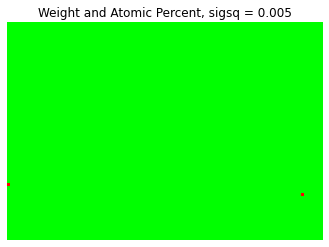

In [7]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.005)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.005')

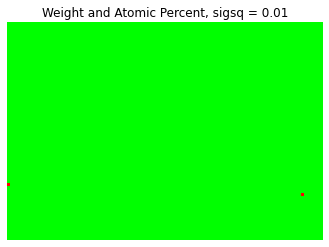

In [8]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.01)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.01')

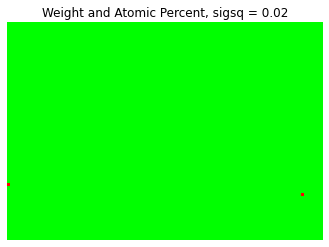

In [9]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.02)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.02')

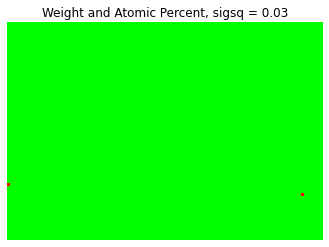

In [10]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.03)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.03')

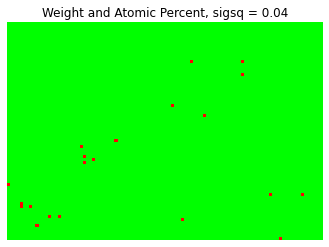

In [7]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.04)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.04')

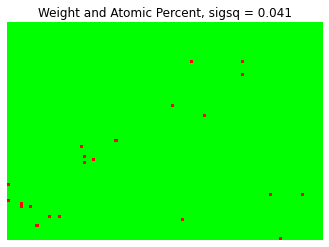

In [9]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.041)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.041')

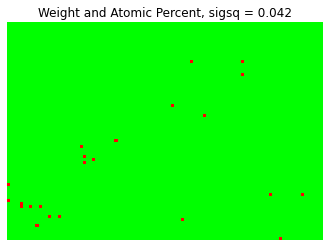

In [8]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.042)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.042')

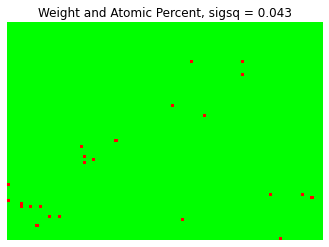

In [9]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.043)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.043')

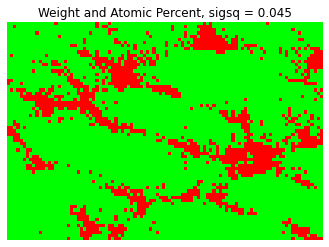

In [8]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.045)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.045')

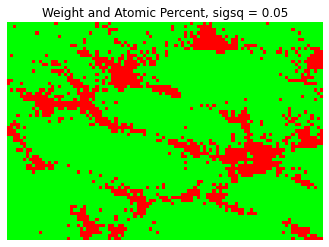

In [12]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.05)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.05')

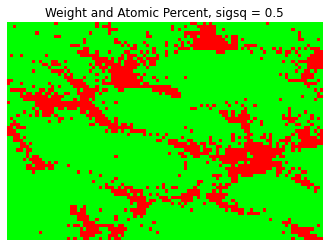

In [13]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 0.5)
colormap(labels, 'Weight and Atomic Percent, sigsq = 0.5')

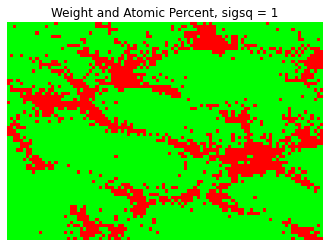

In [14]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 1)
colormap(labels, 'Weight and Atomic Percent, sigsq = 1')

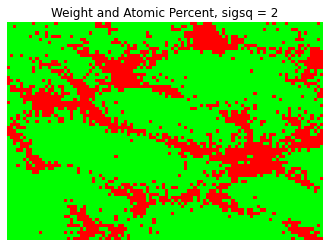

In [15]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 2)
colormap(labels, 'Weight and Atomic Percent, sigsq = 2')

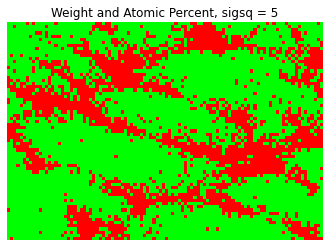

In [16]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 5)
colormap(labels, 'Weight and Atomic Percent, sigsq = 5')

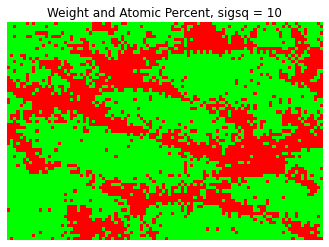

In [17]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 10)
colormap(labels, 'Weight and Atomic Percent, sigsq = 10')

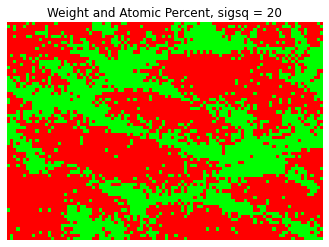

In [10]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 20)
colormap(labels, 'Weight and Atomic Percent, sigsq = 20')

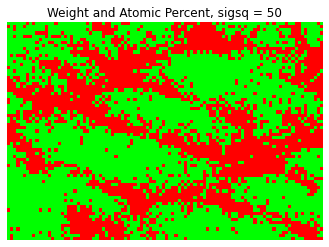

In [19]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 50)
colormap(labels, 'Weight and Atomic Percent, sigsq = 50')

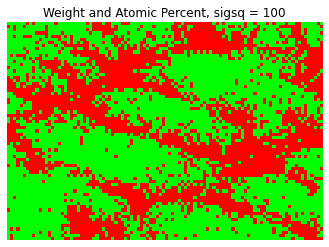

In [20]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 100)
colormap(labels, 'Weight and Atomic Percent, sigsq = 100')

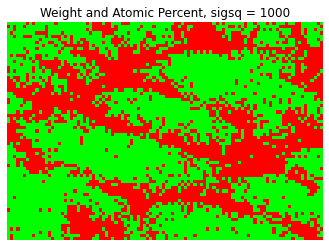

In [21]:
labels = Spectral(data = wt_at, dims = 2, sigsq = 1000)
colormap(labels, 'Weight and Atomic Percent, sigsq = 1000')

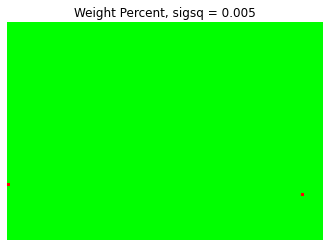

In [22]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.005)
colormap(labels, 'Weight Percent, sigsq = 0.005')

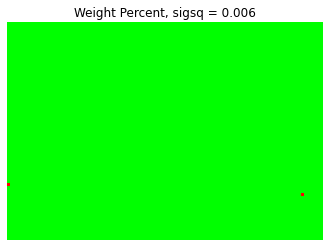

In [11]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.006)
colormap(labels, 'Weight Percent, sigsq = 0.006')

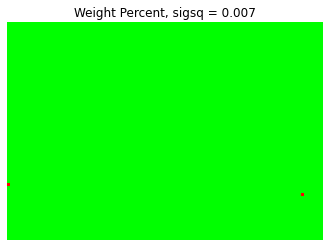

In [12]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.007)
colormap(labels, 'Weight Percent, sigsq = 0.007')

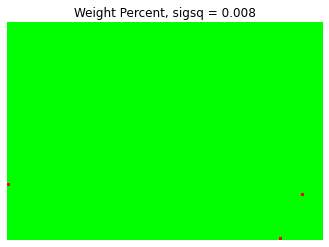

In [13]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.008)
colormap(labels, 'Weight Percent, sigsq = 0.008')

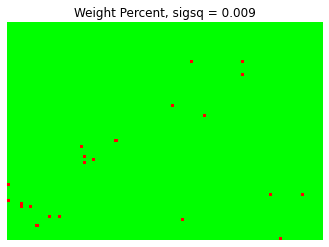

In [14]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.009)
colormap(labels, 'Weight Percent, sigsq = 0.009')

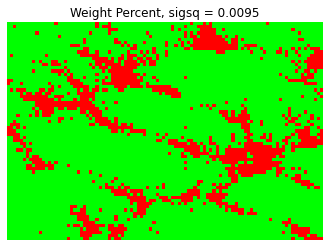

In [10]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.095)
colormap(labels, 'Weight Percent, sigsq = 0.0095')

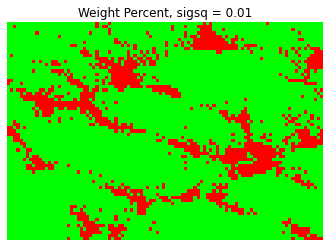

In [23]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.01)
colormap(labels, 'Weight Percent, sigsq = 0.01')

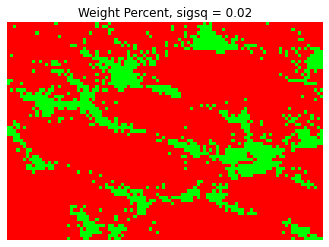

In [24]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.02)
colormap(labels, 'Weight Percent, sigsq = 0.02')

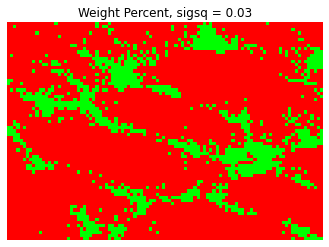

In [25]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.03)
colormap(labels, 'Weight Percent, sigsq = 0.03')

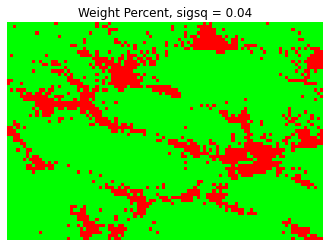

In [26]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.04)
colormap(labels, 'Weight Percent, sigsq = 0.04')

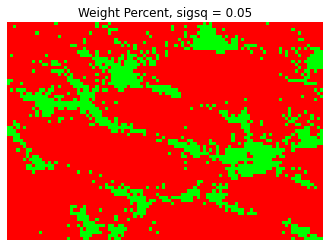

In [27]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.05)
colormap(labels, 'Weight Percent, sigsq = 0.05')

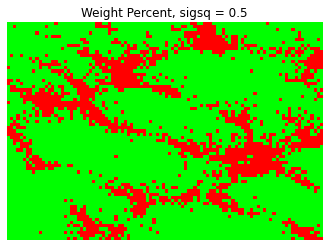

In [28]:
labels = Spectral(data = wt, dims = 2, sigsq = 0.5)
colormap(labels, 'Weight Percent, sigsq = 0.5')

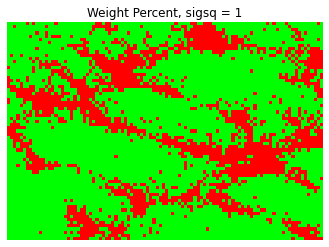

In [29]:
labels = Spectral(data = wt, dims = 2, sigsq = 1)
colormap(labels, 'Weight Percent, sigsq = 1')

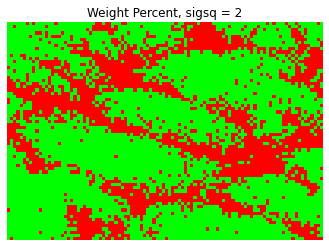

In [30]:
labels = Spectral(data = wt, dims = 2, sigsq = 2)
colormap(labels, 'Weight Percent, sigsq = 2')

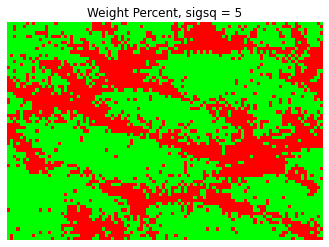

In [31]:
labels = Spectral(data = wt, dims = 2, sigsq = 5)
colormap(labels, 'Weight Percent, sigsq = 5')

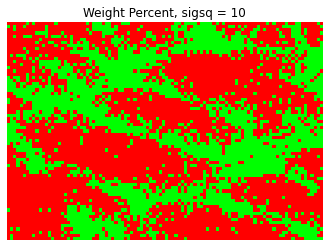

In [32]:
labels = Spectral(data = wt, dims = 2, sigsq = 10)
colormap(labels, 'Weight Percent, sigsq = 10')

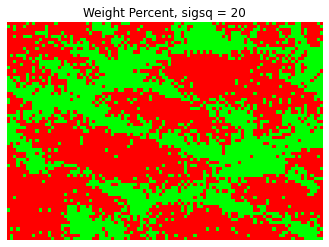

In [33]:
labels = Spectral(data = wt, dims = 2, sigsq = 20)
colormap(labels, 'Weight Percent, sigsq = 20')

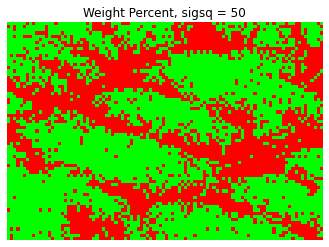

In [34]:
labels = Spectral(data = wt, dims = 2, sigsq = 50)
colormap(labels, 'Weight Percent, sigsq = 50')

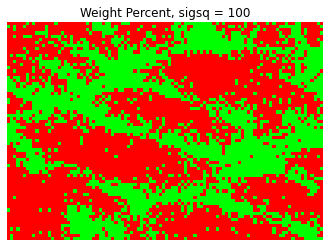

In [35]:
labels = Spectral(data = wt, dims = 2, sigsq = 100)
colormap(labels, 'Weight Percent, sigsq = 100')

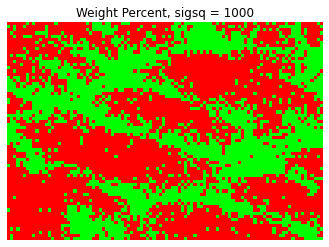

In [36]:
labels = Spectral(data = wt, dims = 2, sigsq = 1000)
colormap(labels, 'Weight Percent, sigsq = 1000')

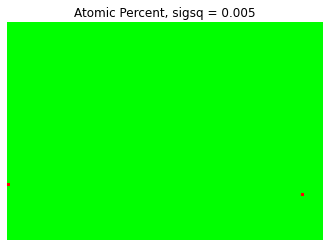

In [37]:
labels = Spectral(data = at, dims = 2, sigsq = 0.005)
colormap(labels, 'Atomic Percent, sigsq = 0.005')

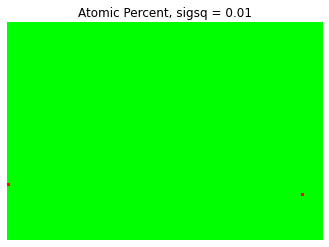

In [38]:
labels = Spectral(data = at, dims = 2, sigsq = 0.01)
colormap(labels, 'Atomic Percent, sigsq = 0.01')

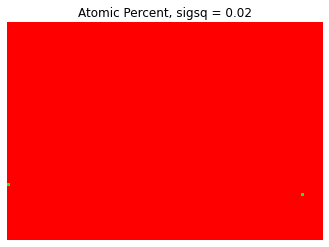

In [39]:
labels = Spectral(data = at, dims = 2, sigsq = 0.02)
colormap(labels, 'Atomic Percent, sigsq = 0.02')

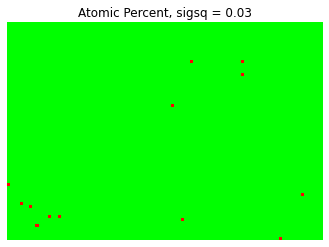

In [40]:
labels = Spectral(data = at, dims = 2, sigsq = 0.03)
colormap(labels, 'Atomic Percent, sigsq = 0.03')

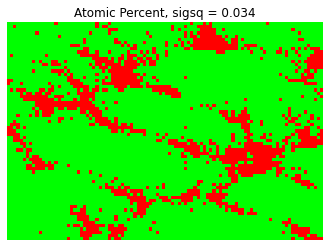

In [12]:
labels = Spectral(data = at, dims = 2, sigsq = 0.034)
colormap(labels, 'Atomic Percent, sigsq = 0.034')

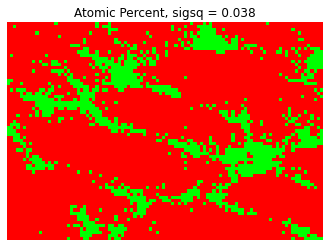

In [9]:
labels = Spectral(data = at, dims = 2, sigsq = 0.038)
colormap(labels, 'Atomic Percent, sigsq = 0.038')

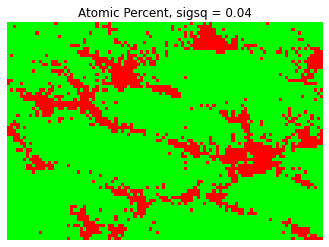

In [41]:
labels = Spectral(data = at, dims = 2, sigsq = 0.04)
colormap(labels, 'Atomic Percent, sigsq = 0.04')

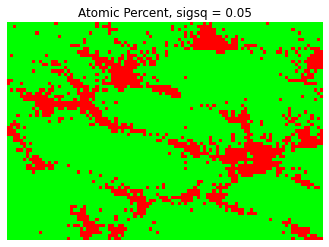

In [42]:
labels = Spectral(data = at, dims = 2, sigsq = 0.05)
colormap(labels, 'Atomic Percent, sigsq = 0.05')

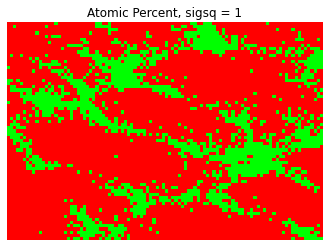

In [43]:
labels = Spectral(data = at, dims = 2, sigsq = 1)
colormap(labels, 'Atomic Percent, sigsq = 1')

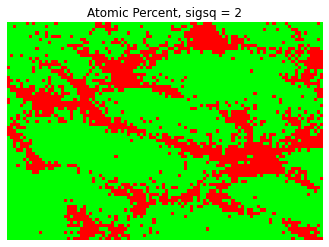

In [44]:
labels = Spectral(data = at, dims = 2, sigsq = 2)
colormap(labels, 'Atomic Percent, sigsq = 2')

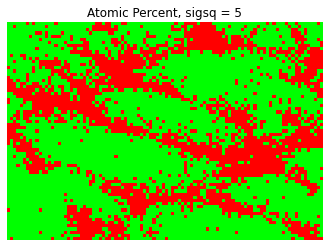

In [45]:
labels = Spectral(data = at, dims = 2, sigsq = 5)
colormap(labels, 'Atomic Percent, sigsq = 5')

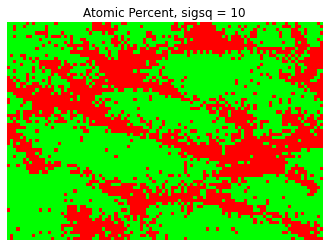

In [46]:
labels = Spectral(data = at, dims = 2, sigsq = 10)
colormap(labels, 'Atomic Percent, sigsq = 10')

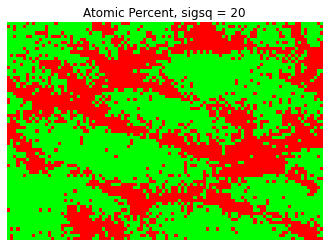

In [47]:
labels = Spectral(data = at, dims = 2, sigsq = 20)
colormap(labels, 'Atomic Percent, sigsq = 20')

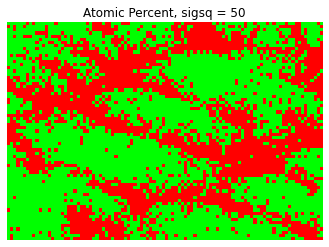

In [48]:
labels = Spectral(data = at, dims = 2, sigsq = 50)
colormap(labels, 'Atomic Percent, sigsq = 50')

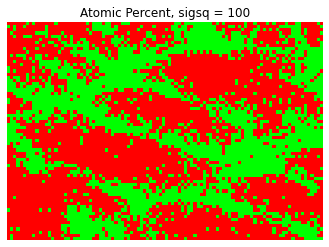

In [49]:
labels = Spectral(data = at, dims = 2, sigsq = 100)
colormap(labels, 'Atomic Percent, sigsq = 100')

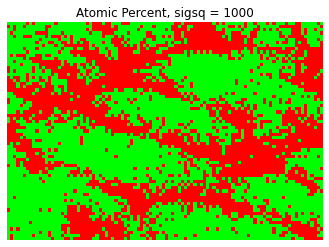

In [50]:
labels = Spectral(data = at, dims = 2, sigsq = 1000)
colormap(labels, 'Atomic Percent, sigsq = 1000')